<a href="https://colab.research.google.com/github/11jolek11/BigDataHCVproject/blob/main/BigDataHCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# /content/drive/MyDrive/Colab Notebooks/datasets/hcvdat0.csv


In [105]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


In [106]:
hcv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/hcvdat0.csv', header=0)
hcv[hcv.isna().any(axis=1)]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
121,122,0=Blood Donor,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
319,320,0=Blood Donor,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,330,0=Blood Donor,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,414,0=Blood Donor,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,425,0=Blood Donor,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
433,434,0=Blood Donor,48,f,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
498,499,0=Blood Donor,57,f,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
540,541,1=Hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0
541,542,1=Hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,546,1=Hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0


<ipython-input-107-84fec86dbd3a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hcv.corr(), annot=True, cmap='rainbow')


<Axes: >

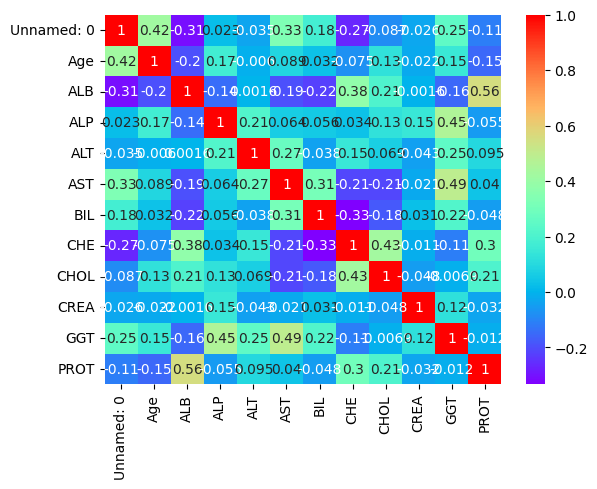

In [107]:
sns.heatmap(hcv.corr(), annot=True, cmap='rainbow')
# ALP CHOL

In [108]:
encoder = LabelEncoder()
hcv["Sex"] = encoder.fit_transform(hcv["Sex"])
hcv["Category"] = encoder.fit_transform(hcv["Category"])

In [109]:
hcv_target = hcv["Category"]
hcv.drop(columns=["Category", 'Unnamed: 0'], inplace=True)

In [110]:
imputer = KNNImputer(n_neighbors=5).set_output(transform="pandas")
hcv = imputer.fit_transform(hcv)
hcv[hcv.isna().any(axis=1)]

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT


In [111]:
# hcv["Category"] = hcv_target
# sns.pairplot(hcv, hue="Category")
# hcv.drop(columns=["Category"], inplace=True)

<Axes: xlabel='lda2', ylabel='lda1'>

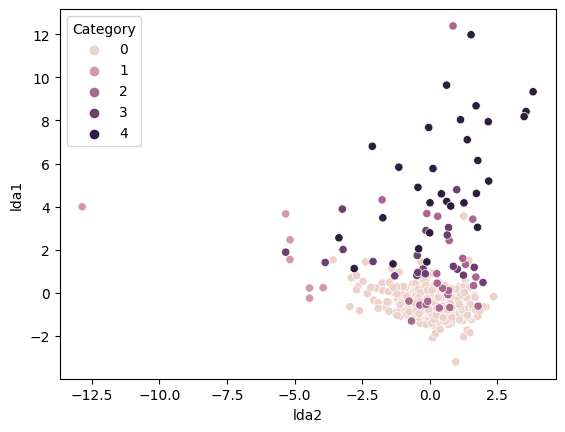

In [112]:
lda = LDA(n_components=2)
hcv_lda = pd.DataFrame(lda.fit_transform(hcv, hcv_target), columns=['lda1', 'lda2'])
sns.scatterplot(data=hcv_lda, x='lda2', y='lda1', hue=hcv_target)

<Axes: xlabel='pca1', ylabel='pca2'>

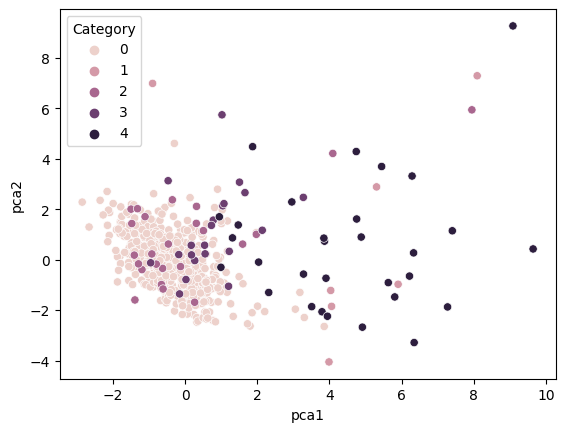

In [114]:

pca_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('pca_dim_reduction', PCA(n_components=2)),
    ]
)

hcv_pca = pd.DataFrame(pca_pipeline.fit_transform(hcv), columns = ['pca1', 'pca2'])
sns.scatterplot(data=hcv_pca, x='pca1', y='pca2', hue=hcv_target)